In [4]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Classification

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B
- Study the ROC Curve, decide threshold
- Use 2 classifiers.
    - Random Forest
        - tune only: n_estimators: {3, 4, 6, 7, 10, 20, 50, 100}
    - KNN Classfier
        - tune only: n_neighbors: {3, 4, 5, 7, 10, 20, 50}
    - Which one performs better in the cross validation?
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Cross-validation with 4-folds.

- Other paramenters -> Use default

Notes:
  - Make your code modular, the second part of the assignmet you will have to repeat.
  - Include documentation for your code

In [5]:
### Your code here

## Feel free to use multiple cells

df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls",
                   sheet_name = 0, skiprows= 1, header = 0)

In [6]:
#df.loc[df.index[3329],"BILL_AMT6"]
df.iloc[3330]

ID                             3331
LIMIT_BAL                     50000
SEX                               1
EDUCATION                         2
MARRIAGE                          2
AGE                              29
PAY_0                             1
PAY_2                             2
PAY_3                             0
PAY_4                             0
PAY_5                             0
PAY_6                             0
BILL_AMT1                     49612
BILL_AMT2                     48546
BILL_AMT3                     49157
BILL_AMT4                     49890
BILL_AMT5                     48941
BILL_AMT6                     49940
PAY_AMT1                          0
PAY_AMT2                       1900
PAY_AMT3                       1333
PAY_AMT4                          0
PAY_AMT5                        999
PAY_AMT6                          0
default payment next month        0
Name: 3330, dtype: int64

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
max(df.loc[:,"PAY_0"])

8

**Is the Data set balanced?**

0    23364
1     6636
Name: default payment next month, dtype: int64

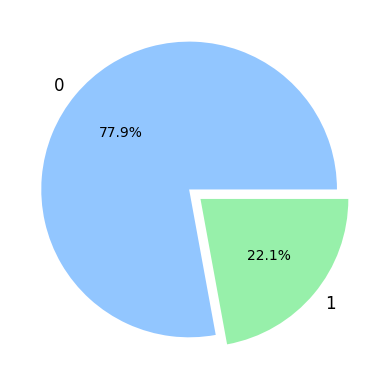

In [9]:
def check_data_balance(series, style="seaborn-pastel"):
  with plt.style.context(style):
    unique = series.value_counts()
    display(unique) #show unique value counts of the target
    plt.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%'); #plot a pie chart for the target to s

check_data_balance(df["default payment next month"])

In [10]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [11]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Histograms**

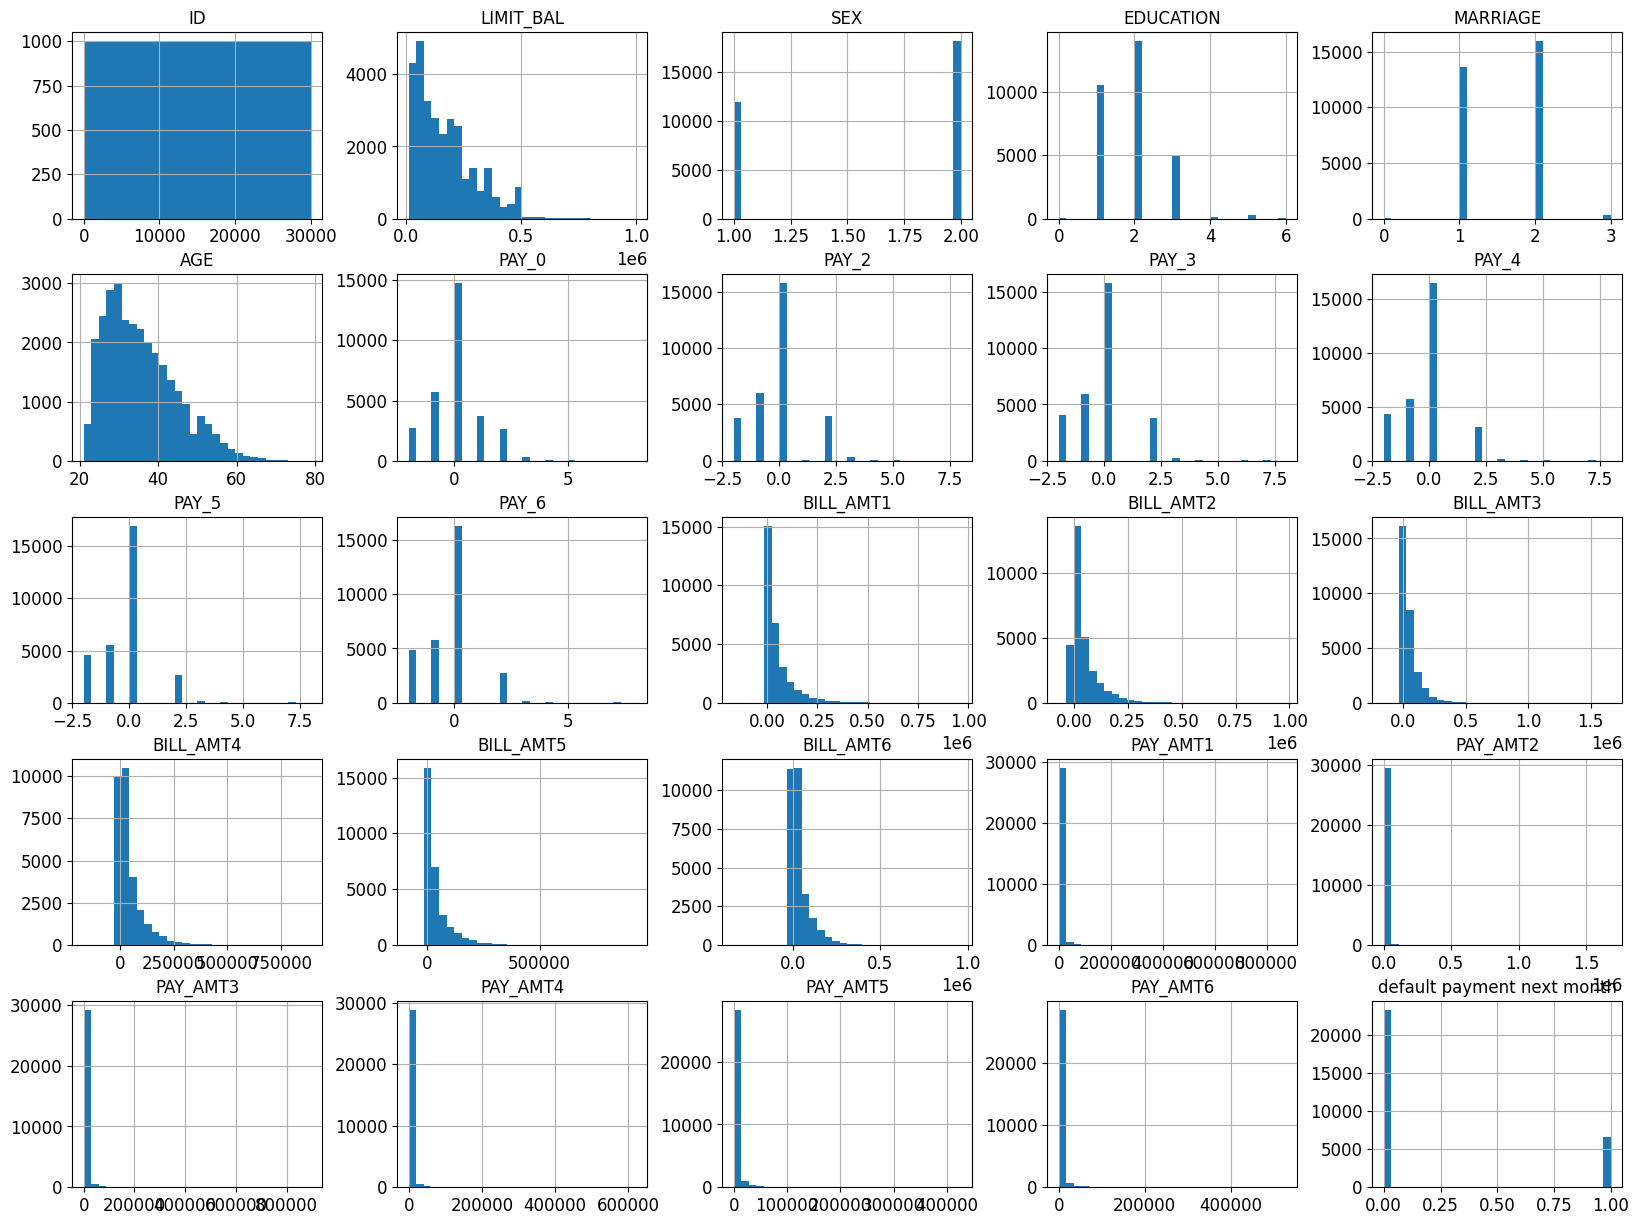

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

#_ = df.hist(figsize=(20,15))

## **Machine Learning**

**Choose X and Y**

In [13]:
TARGET = "default payment next month"
columns_predictors = [col for col in df.columns if col not in [TARGET]]
columns_categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]
print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical: {columns_categorical}")
print(f"columns_numerical: {columns_numerical}")

TARGET: default payment next month
columns_predictors: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
columns_categorical: ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
columns_numerical: ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [14]:
X = df[columns_predictors]
y = df[TARGET]
display(X)
display(y)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,29999,80000,1,3,1,41,1,-1,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

# **Train-test Split**

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)
#train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)

In [17]:
display(X_train)
display(y_train)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19682,19683,200000,2,2,1,46,0,0,0,0,...,104137,103422,95206,65108,3692,5000,3300,2500,2930,1500
11062,11063,120000,2,1,1,32,-1,-1,-1,-1,...,326,476,802,326,652,326,476,802,0,326
197,198,20000,2,1,2,22,0,0,0,0,...,19065,8332,18868,19247,1500,1032,541,20000,693,1000
23620,23621,100000,2,5,2,34,0,0,0,0,...,87244,23181,7721,3219,5004,3811,3002,4000,3219,1864
26031,26032,290000,2,2,2,29,0,0,0,0,...,8389,8770,9145,10016,1130,1502,1300,500,1000,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,380000,2,2,1,37,0,0,0,0,...,13277,14291,15949,15556,1204,1300,1242,1900,0,3000
17730,17731,360000,2,1,1,54,1,-2,-2,-1,...,0,2580,2580,6941,0,0,2580,0,6941,0
28030,28031,50000,2,3,1,29,0,0,0,0,...,46777,39420,8824,9009,2002,2000,1530,1000,327,329
15725,15726,30000,2,2,2,21,0,0,0,0,...,29435,30841,29434,16565,2000,2000,2000,1765,331,0


19682    0
11062    1
197      0
23620    0
26031    0
        ..
28636    0
17730    0
28030    1
15725    0
19966    0
Name: default payment next month, Length: 24000, dtype: int64

0    18668
1     5332
Name: default payment next month, dtype: int64

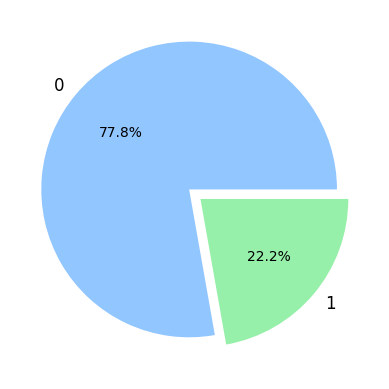

In [18]:
check_data_balance(y_train)

0    4696
1    1304
Name: default payment next month, dtype: int64

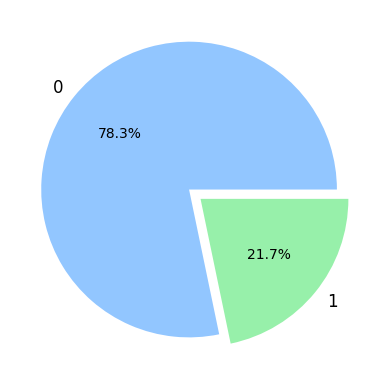

In [19]:
check_data_balance(y_test)

# **Preprocessing with Pipeline**

**Define the pipelines**

In [38]:
from sklearn.pipeline import Pipeline #each pipeline can have multiple steps
from sklearn.compose import ColumnTransformer #for selecting specific columns and transforming them with individual pipelines
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder #specific transformations we want to use in our pipelines

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder()),
])

pipeline_numerical = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0,1))),
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical),
  ("numerical", pipeline_numerical, columns_numerical),
])

**Apply the Pipeline**

In [39]:
pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")

X_train_transformed.shape: (18000, 92)
X_test_transformed.shape: (12000, 92)


In [22]:
X_train[columns_categorical]

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
19682,2,2,1,0,0,0,0,0,0
11062,2,1,1,-1,-1,-1,-1,-1,2
197,2,1,2,0,0,0,0,-1,0
23620,2,5,2,0,0,0,0,0,-1
26031,2,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
28636,2,2,1,0,0,0,0,0,2
17730,2,1,1,1,-2,-2,-1,0,-1
28030,2,3,1,0,0,0,0,0,0
15725,2,2,2,0,0,0,0,0,0


# **Train ML model on the transformed training set**

# **Random Forest Classifier**

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [3, 4, 6, 7, 10, 20, 50, 100]}

#define the model to tune
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(forest_clf, param_grid, cv=4, #choose cv for grid search
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [3, 4, 6, 7, 10, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [41]:
#see the best hyperparameters found during tuning
grid_search.best_params_

{'n_estimators': 100}

In [42]:
#get the best model after tuning
grid_search.best_estimator_

RandomForestClassifier(random_state=42)

In [43]:
#see the results during tuning
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.48264318543251433 {'n_estimators': 3}
0.458378785625067 {'n_estimators': 4}
0.44783429475148007 {'n_estimators': 6}
0.45049355649603295 {'n_estimators': 7}
0.43969686527576396 {'n_estimators': 10}
0.4319207746283519 {'n_estimators': 20}
0.42772005382544837 {'n_estimators': 50}
0.4258977446393546 {'n_estimators': 100}


In [44]:
from sklearn.model_selection import cross_val_predict
forest_clf_tuned = RandomForestClassifier(n_estimators=100, random_state=42)

y_probas_forest = cross_val_predict(forest_clf_tuned, X_train_transformed, y_train, cv=4,
                                    method="predict_proba")

In [45]:
y_probas_forest

array([[0.8 , 0.2 ],
       [0.86, 0.14],
       [0.37, 0.63],
       ...,
       [0.87, 0.13],
       [0.66, 0.34],
       [0.92, 0.08]])

# **ROC Curves**

In [47]:
from sklearn.metrics import roc_curve

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)


In [48]:
y_scores_forest

array([0.2 , 0.14, 0.63, ..., 0.13, 0.34, 0.08])

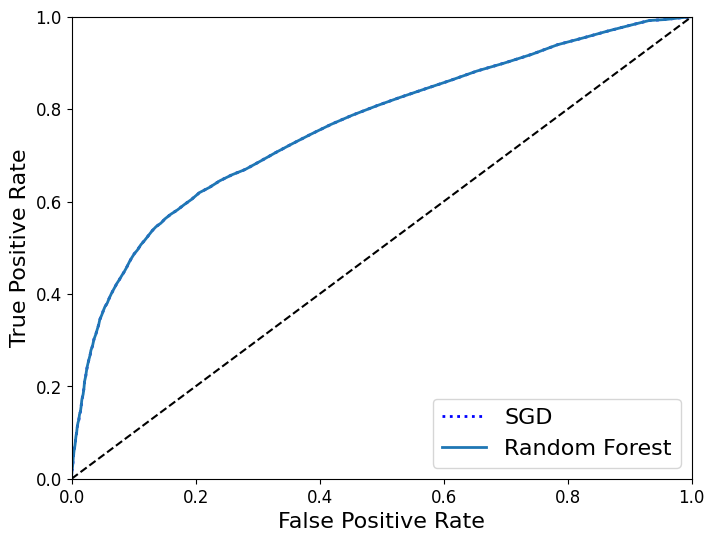

In [49]:
# test = 0.4
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

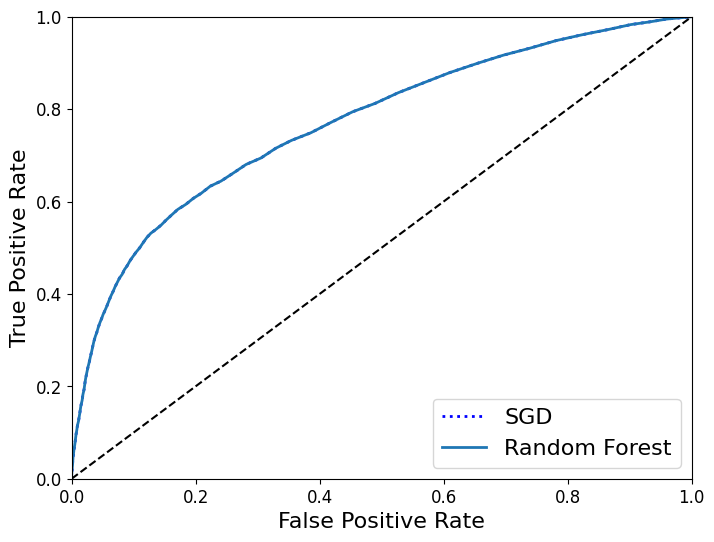

In [35]:
# test = 0.2
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [50]:
# test = 0.4
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores_forest)

0.7627631502065791

In [36]:
# test = 0.2
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores_forest)

0.7685932926610697

In [ ]:
# Cross-validation with 5-folds
# Did you get different results compared to the 4-fold case?

#### Conclusions?

Explain your results and choices

Q2. (Optional) Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

### Conclusions
